In [2]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(tibble.print_min = 6)

library(ggthemr)
ggthemr("light") #, layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



# Confidence Interval 

평균이 $\mu$ 이고 분산이 $\sigma^2$ 인 모집단으로부터 추출된 표본 사이즈가 $n$ (size=$n$)인 표본들에 대해서  
![](images/sampling2.png){width=400}  
Source: *The Truthful Art* by Albert Cairo.

표본 **평균**들 $\bar{X}$ 의 분포를 **평균의 표본 분포, the sampling distribution of the mean **이라고 하고, 이 분포는 the central limit theorem에 의해

- 평균:&nbsp; $\displaystyle E(\bar{X})=\frac{m_1+m_2+m_3+\cdots+m_w}{w}\Bigg|_{w\rightarrow\infty}\rightarrow ~~~\mu$  ; unbiased estimator (mean or regression coefficient vs. R)

- 분산:&nbsp; $\displaystyle V(\bar{X})\Bigg|_{w\rightarrow\infty}\rightarrow ~~~\frac{\sigma^2}{n},$ &emsp; 표준 편차 $\displaystyle\frac{\sigma}{\sqrt{n}}$ 를 **standard error of estimate** (SE)라고 함.
  - 이 standard error of estimate는 다시 말하면, 어떤 통계치(여기서는 평균)가 표본들 간에 얼마나 차이가 나는지를 알 수 있는 중요한 지표가 됨.

- 분포: 모집단의 분포가 normal에 가까울 수록, 또는 표본 크기가 클수록 ( $n\rightarrow\infty, n > 30$ )
    $\displaystyle\{m_1, m_2, m_3, \cdots, m_w, \cdots\} \sim N(\mu, \frac{\sigma}{\sqrt{n}}) : normal ~ distribution$ (정규 분포)

- 값을 정규화하면; $\displaystyle Z=\frac{X-\mu}{\frac{\sigma}{\sqrt{n}}}$

    분포: $\displaystyle\{z_1, z_2, z_3, \cdots, z_w, \cdots\} \sim N(0, 1) : standard ~ normal ~ distribution$ (표준 정균 분포)

실제 예를 통해서 살펴보면,  
예를 들어 어느 섬에 사는 민족의 남성 평균 키가 아래와 같은 분포를 가진다고 할 때 (평균: 173cm, 표준편차: 5cm),  
관찰한 **100명의 한 표본**에서 남성들의 키가 평균 174cm로 관찰되었다면 이 정도로 큰 값이 나올 가능성은 얼마정도 인가?


## The Sampling Distribution of the Mean

In [190]:
#| echo: false
library(latex2exp)
set.seed(123)
df_normal <- tibble(
  x = rchisq(10000, 4)) |>
  mutate(x = (x - mean(x))/sd(x)*5 + 173)

library(car)
library(ggpubr)

set.seed(123)

N <- 1000
vec_mean <- vector("integer", N)
for (i in 1:N) {
  vec_mean[i] <- df_normal |> sample_n(25) |> pull(x) |> mean()
}
df_mean <- tibble(m = vec_mean)

set.seed(123)
N <- 1000
vec_mean2 <- vector("integer", N)
for (i in 1:N) {
  vec_mean2[i] <- df_normal |> sample_n(100) |> pull(x) |> mean() 
}
df_mean2 <- tibble(m = vec_mean2)

Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”


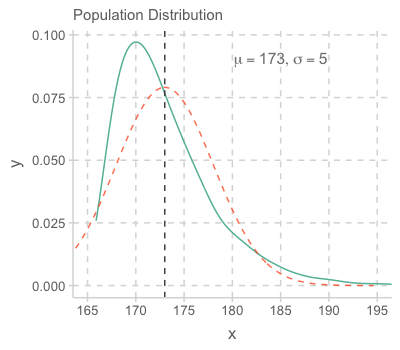

Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”
Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”


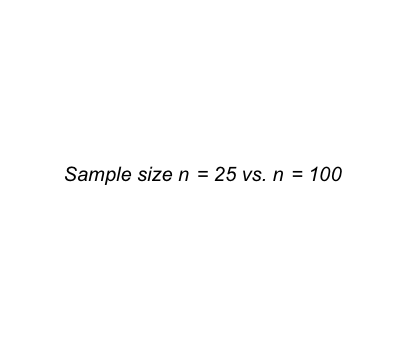

Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”
Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”


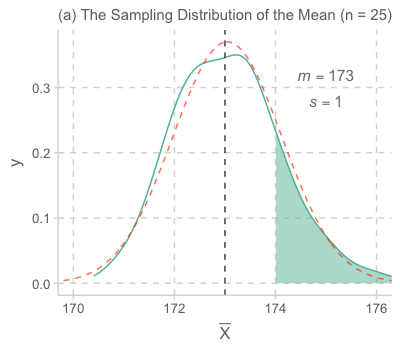

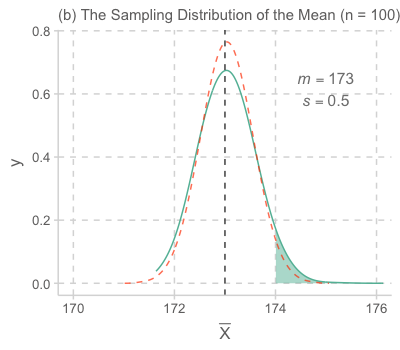

In [191]:
#| echo: false
#| layout-ncol: 2
options(repr.plot.width = 4, repr.plot.height = 3.5, repr.plot.res = 100)
library(latex2exp)

df_normal |> 
  ggplot(aes(x)) +
  geom_density(bw=1.2) +
  geom_vline(xintercept = 173, color="grey30", linetype = 2) +
  scale_x_continuous(breaks = seq(165, 195, 5)) +
  coord_cartesian(xlim=c(165, 195)) +
  stat_overlay_normal_density(color = "orangered", linetype = 2, alpha = .7) +
  annotate("text", x = 185, y = .09, size = 4,
           label = TeX(
             sprintf(r"($\mu = %.2f, \sigma = %.2f $)", 
                     mean(df_normal$x), sd(df_normal$x)), 
             italic = TRUE),
           color = "grey50", parse = TRUE) +
  labs(subtitle = "Population Distribution")

plot(TeX(r"( Sample size $n$ = 25 vs. $n$ = 100)", italic = TRUE), cex = 1.2)

m_density <- density(df_mean$m, bw = .3)
m_density <- tibble(x = m_density$x, y = m_density$y)

df_mean |>
  ggplot(aes(x = m)) +
  geom_density(bw = .3) +
  geom_area(data = m_density |> filter(x >= 174), aes(x, y), alpha = .5) +
  geom_vline(xintercept = 173, color="grey30", linetype = 2) +
  coord_cartesian(xlim=c(170, 176)) +
  annotate("text", x = 175, y = .32, size = 4,
           label = TeX(
             sprintf(r"($m = %.3f)", 173), italic = TRUE),
           color = "grey50") +
  annotate("text", x = 175, y = .28, size = 4,
           label = TeX(
             sprintf(r"($s = %.3f$)", 1), italic = TRUE),
           color = "grey50") +         
  stat_overlay_normal_density(color = "orangered", linetype = 2, alpha = .7) +
  labs(x = TeX(r"($\bar{X}$)"), subtitle = "(a) The Sampling Distribution of the Mean (n = 25)")

m2_density <- density(df_mean2$m, bw = .3)
m2_density <- tibble(x = m2_density$x, y = m2_density$y)

df_mean2 |>
  ggplot(aes(x = m)) +
  geom_density(bw = .3) +
  geom_area(data = m2_density |> filter(x >= 174), aes(x, y), alpha = .5) +
  geom_vline(xintercept = 173, color="grey30", linetype = 2) +
  coord_cartesian(xlim=c(170, 176)) +
  annotate("text", x = 175, y = .65, size = 4,
           label = TeX(
             sprintf(r"($m = %.3f$)", 173), italic = TRUE),
           color = "grey50") +
  annotate("text", x = 175, y = .58, size = 4,
           label = TeX(
             sprintf(r"($s = %.3f$)", .5), italic = TRUE),
           color = "grey50") +
  stat_overlay_normal_density(color = "orangered", linetype = 2, alpha = .7) +
  labs(x = TeX(r"($\bar{X}$)"), subtitle = "(b) The Sampling Distribution of the Mean (n = 100)")

(b)의 경우 즉, 표본 사이즈가 n = 100인 경우처럼 평균의 표본 분포는 빠르게 **정규 분포**에 다가가므로 근사적으로 정규 분포의 값을 이용해 그 확률 값을 쉽게 구할 수 있음.  
특히, 값들을 정규화하여 표준정규분포 (평균 0, 표준편차 1)의 값을 이용함.  

$\displaystyle \frac{174 - 173}{0.5} = 2, ~~ \bar{Z}=\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$

음영된 부분은 대략 2.3%이고, 따라서 100명을 관찰한 표본의 평균 키가 174cm이상이 될 가능성은 2.3%에 밖에 되지 않음.


Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”
Warning message in is.na(x):
“is.na()는 유형이 'expression'인 (리스트 또는 벡터)가 아닌 것에 적용되었습니다”


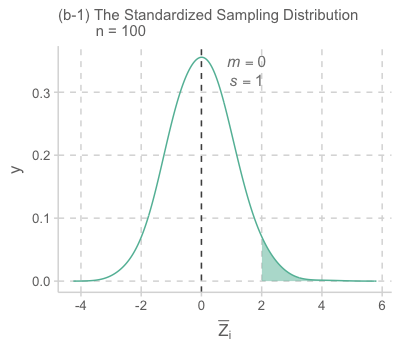

In [189]:
#| echo: false
#| layout-ncol: 2

df_mean2 <- df_mean2 |> mutate(m_std = scale(m)[, ])
m2_density <- density(df_mean2$m_std, bw = .5)
m2_density <- tibble(x = m2_density$x, y = m2_density$y)

m2_density |>
  ggplot(aes(x, y)) +
  geom_line() +
  geom_area(data = m2_density |> filter(x >= 2), alpha = .5) +
  geom_vline(xintercept = 0, color="grey30", linetype = 2) +
  #coord_cartesian(xlim=c(170, 176)) +
  annotate("text", x = 1.5, y = .35, size = 4,
           label = TeX(
             sprintf(r"($m = %.3f$)", 
                     mean(df_mean2$m_std)), italic = TRUE),
           color = "grey50") +
  annotate("text", x = 1.5, y = .32, size = 4,
           label = TeX(
             sprintf(r"($s = %.3f$)", 
                     sd(df_mean2$m_std)), italic = TRUE),
           color = "grey50") +
  labs(x = TeX(r"($\bar{Z}_i$)"), subtitle = "(b-1) The Standardized Sampling Distribution \n         n = 100")

실제 성취하고자 하는 유용한 분석은 위 과정의 반대인, 관찰한 특정 표본으로부터 모집단에 대해 추론하는 것임.  
이를 **통계적 추론, statistical inference**라고 함.

가령, 어느 섬에 사는 민족으로부터 관찰된 100명의 키의 평균이 175cm이고 표준편차가 10cm인 경우, 이 민족의 키의 평균은 얼마 정도라고 파악할 수 있는가?

- 먼저, 모집단의 평균 $\mu$ 를 **가정**하는데, 가령 $\mu = 173$ 라면, 우리가 관찰한 표본의 평균 175는 충분히 나올 수 있는 값인가? 이에 대해서는 위의 논리에 따라 구할 수 있음. 즉, 
  - $\displaystyle \frac{175 - 173}{\frac{\sigma}{10}} = ~?, ~~ \bar{Z}=\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$
  - 만약, 모집단의 표준편차 $\sigma$ 가 예전처럼 5라면, $\bar{Z} = 4$ 가 되어 매우 희박한 경우가 될 것임. (실제로 0.0032%)
  - 모집단의 표준편차를 알 수 없기 때문에 차선책으로, 관찰한 **표본의 표준편차**를 대체해서 전개함
  - 이 경우, 표본의 표준편차가 10이기 때문에, $\bar{Z} = 2$ 가 되어 2.3% 정도의 가능성이 있다고 볼 수 있으나,
  - 표준편차의 대체로 인해 생기는 문제를 보완할 수 있는데, 사실 표본분포가 정규분포가 아닌 Student's t-분포를 따르고, 이를 이용해서 확률값을 구함.
  - 이 경우는 $\displaystyle t = \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}} = 2, ~ (s: the ~sample ~sd)$ 로 t-분포에 의하면 2.4% 정도의 가능성이 있다고 봄
    - t-분포는 자유도(degree of freedom)에 의해 분포가 바뀌는데 df는 n-1 (n: 표본 크기)
- 이제 위의 과정을 계속 반복한다고 상상하면, 즉 모집단의 평균을 다른 값으로 가정하면서,  
  - 관찰된 표본 평균 175cm가 95% (양 극단 2.5%를 제외한) 이내에서 관찰될 수 있는 모집단의 평균들을 모두 찾을 수 있음
  - 이 평균들의 범위를 95% **confidence interval** 이라고 부르고,
  - 식으로 전개하면, 
      $\displaystyle\Bigg| \frac{m-\mu}{\frac{s}{\sqrt{n}}} \Bigg| < 1.66, ~(n=100)$  
      $\displaystyle m-1.66\frac{s}{\sqrt{n}} < \mu < m + 1.66\frac{s}{\sqrt{n}}$
  - 위 예의 경우 $\displaystyle 173.34 < \mu < 176.66$
  - 즉, 우리는 95%의 확신을 갖고, 이 섬에 사는 민족의 평균 키는 173.34cm에서 176.66cm 사이에 있을 것이라고 말할 수 있음.
  - 이 cofidence interval의 크기를 결정하는 것은 $\displaystyle\frac{s}{\sqrt{n}}$ 즉, **standard error of estimate**인데, 범위가 좁아질수록, **precision**이 높다고 표현함.
  - 한편, 99%의 확신으로 (confidence level: 99%)는 그 키의 범위를 더 넓혀서 말할 수 있음. 이 경우 $|~t~| < 2.36$ 으로부터 모집단의 키가 (172.64cm, 177.36cm) 범위가 있다고 말할 수 있음.
    - 확신이 커지는 대신 범위가 넓어지므로 모집단의 예측에 대한 유용성이 떨어짐.


## Regression Model Coefficients

위의 논리와 비슷하게 회귀 계수가 표본 마다 얼마나 변하는 지를 구할 수 있고,  
회귀 계수에 대한 confidence interval을 구할 수 있음.  
변수가 한 개인 경우:  
회귀계수 $b$ 에 대한 표본 분포는 평균이 $b$ 인 정규분포를 따르고, 표준편차 즉, standard error of estimate는 근사적으로 다음과 같음  

$\displaystyle SE^2(b) = \frac{{MS}_{residual}}{N \cdot Var(X)}$

Confidence interval: $b\pm t_{\alpha/2}SE, ~(df = N-2)$

다중 회귀 모형의 경우:  
예측변수 $X_j$ 에 대해서 모집단의 회귀계수 $b_j$ 에 대한 표본 분포는 평균이 $b_j$ 인 정규분포를 따르고, 표준편차, 즉 standard error는 근사적으로 다음과 같음.

$\displaystyle SE^2(b_j) = \frac{{MS}_{residual}}{N \cdot Var(X_j) \cdot (1 - R^2_j)}, ~(df = N-k-1)$

- 표본 사이즈가 클수록
- 평균 잔차가 작을수록
- jth 예측변수의 값이 퍼져 있을수록
- 다른 예측변수들로부터 jth 예측변수가 예측되지 못할수록; 즉 다른 변수들과 correlate되지 않을수록 
  - $1 - R^2_j$ 을 tolerance, 그 역수를 variance inflation factor (VIF)라고 부름
  - Tolerance가 극히 작은 것은 intolerable! 봐줄 수 없음!
    - 예를 들어, 어느 문화에서 남자아이에게는 자기 주장이 강하도록 훈육하고, 여자아이에게는 반대로 훈육한다고 합니다. 만약, 자기주장이 강하도록 부모가 교육하는 것이 자녀가 자기주장이 강하게 되는데 영향을 미친다는 것을 살펴보는데, 성별을 통계적으로 통제한다면, 훈육의 효과는 통계적으로 계산되기 어렵습니다. 왜냐하면, 성별과 훈육방식이 크게 상관관계를 가지기 때문에, 성별과 독립적인 훈육의 변량이 작아지기 때문에, 회귀계수의 precision이 크게 낮아집니다.

## Regression Model itself

# An Resampling Approach
Bootstrap

::: {.callout-note collapse=true}
#### Distribution generator
<iframe src="http://www.statdistributions.com/f?p=0.05&df1=2&df2=100" width="900" height="800"></iframe>

:::